#*Relatórios semanais*
## Projeto individual módulo 4 Resilia | Senac


## Contexto:

Uma determinada loja deseja produzir relatórios
semanais com ganhos e despesas. O gerente da
loja te contratou para gerar um relatório de uma
semana para mostrar ao dono da loja como a
análise dos dados pode ser útil para eles. Para
isso, ele te enviou uma tabela de exemplo das
despesas de uma semana:
CONTEXTO
Além disso, ele informou que os ganhos não estão nessa planilha, mas que ele
possui a seguinte lista: 2200, 2420.50, 3391, 5322, 4898.50, 4200, 3893
respectivos aos dias da semana. Ele te deixou bem livre para incluir no relatório as
estatísticas que desejar, mas ele deseja que o relatório contenha outros dados que
veremos a seguir...

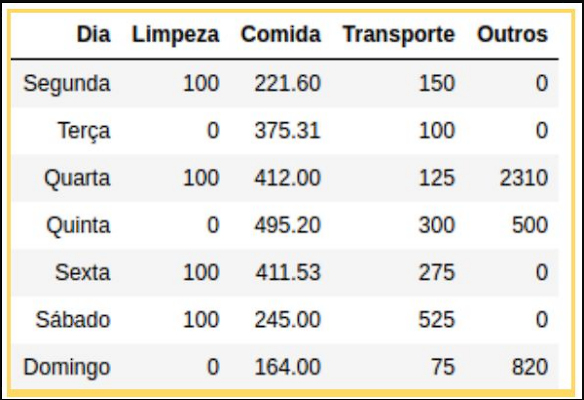

##Objetivos:

Gerar um relatório de uma semana para mostrar ao dono da loja como a análise dos
dados pode ser útil e incluir no relatório outros itens:

■ A subtração de impostos dos ganhos diários, que nesta semana foi de 7%;

■ A soma total dos ganhos;

■ A média semanal dos ganhos;

■ A soma total das despesas por categoria;

■ A média semanal de todas as despesas;

■ O lucro diário para informar qual dia foi mais lucrativo e o lucro total da semana;

■ Uma organização com textos explicando o que foi feito para obter os valores e
os resultados bem apresentados.


In [ ]:
import pandas as pd

In [ ]:
Dados_Semana = {'Dia': ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo'] ,
                'Limpeza' : [100 , 0 , 100, 0 , 100 , 100 , 0] ,
                'Comida' : [221.60 , 375.31 , 412 , 495.20 , 411.53 , 245 , 164] ,
                'Transporte' : [150 , 100 , 125 , 300 , 275 , 525 , 75] ,
                'Outros' : [0 , 0 , 2310, 500 , 0 , 0 ,820] , 
                'Ganhos' : [2200, 2420.50, 3391, 5322, 4898.50, 4200, 3893]}
Dados_Semana_DF = pd.DataFrame(Dados_Semana) 
display(Dados_Semana_DF)

,Dia,Limpeza,Comida,Transporte,Outros,Ganhos
0,Segunda-Feira,100,221.60,150,0,2200.0
1,Terça-Feira,0,375.31,100,0,2420.5
2,Quarta-Feira,100,412.00,125,2310,3391.0
3,Quinta-Feira,0,495.20,300,500,5322.0
4,Sexta-Feira,100,411.53,275,0,4898.5
5,Sábado,100,245.00,525,0,4200.0
6,Domingo,0,164.00,75,820,3893.0


# A subtração de impostos dos ganhos diários, que nesta semana foi de 7%;

In [ ]:
Dados_Semana_DF['Ganhos_Líquidos'] = Dados_Semana_DF['Ganhos'] * 0.93
display(Dados_Semana_DF[['Dia', 'Ganhos_Líquidos']])

,Dia,Ganhos_Líquidos
0,Segunda-Feira,2046.000
1,Terça-Feira,2251.065
2,Quarta-Feira,3153.630
3,Quinta-Feira,4949.460
4,Sexta-Feira,4555.605
5,Sábado,3906.000
6,Domingo,3620.490


# A soma total dos ganhos;

In [ ]:
#Sendo considerados os ganhos líquidos para o cálculo.
total_ganhos = Dados_Semana_DF['Ganhos_Líquidos'].sum()
print('Total de ganhos: R$ {:.2f}'.format(total_ganhos))

Total de ganhos: R$ 24482.25


# A média total dos ganhos;

In [ ]:
#Sendo considerados os ganhos líquidos para o cálculo.
avg_ganhos = Dados_Semana_DF['Ganhos_Líquidos'].mean()
print('Media de ganhos: R$ {:.2f}'.format(avg_ganhos))

Media de ganhos: R$ 3497.46


#  A soma total das despesas por categoria;

In [ ]:
total_despesas = [ Dados_Semana_DF ['Limpeza'].sum() , Dados_Semana_DF ['Comida'].sum(), Dados_Semana_DF ['Transporte'].sum(), Dados_Semana_DF ['Outros'].sum()]
print("A soma total da limpeza é R${:.2f}.".format(total_despesas[0]))
print("A soma total da Comida é R${:.2f}.".format(total_despesas[1]))
print("A soma total da Transporte é R${:.2f}. ".format(total_despesas[2]))
print("A soma total da categoria outros é R${:.2f}. ".format(total_despesas[3]))

A soma total da limpeza é R$400.00.
A soma total da Comida é R$2324.64.
A soma total da Transporte é R$1550.00. 
A soma total da categoria outros é R$3630.00. 


# A média semanal de todas as despesas;


In [ ]:
#Cálculo da média entre os dias.
total_despesas = [ Dados_Semana_DF ['Limpeza'].mean() , Dados_Semana_DF ['Comida'].mean(), Dados_Semana_DF ['Transporte'].mean(), Dados_Semana_DF ['Outros'].mean()]
print("A média total da limpeza é R${:.2f}.".format(total_despesas[0]))
print("A média soma total da Comida é R${:.2f}.".format(total_despesas[1]))
print("A média total da Transporte é R${:.2f}. ".format(total_despesas[2]))
print("A média total da categoria outros é R${:.2f}. ".format(total_despesas[3]))

A média total da limpeza é R$57.14.
A média soma total da Comida é R$332.09.
A média total da Transporte é R$221.43. 
A média total da categoria outros é R$518.57. 


 # O lucro diário para informar qual dia foi mais lucrativo e o lucro total da semana;

In [ ]:
# Calcula o lucro diário e adiciona uma nova coluna ao DataFrame
Dados_Semana_DF['Lucro diário'] = (Dados_Semana_DF['Ganhos_Líquidos'] ) - (Dados_Semana_DF['Limpeza'] + Dados_Semana_DF['Comida'] + Dados_Semana_DF['Transporte'] + Dados_Semana_DF['Outros'])
#Ordenando do dia mais lucrativo para o menos lucrativo
Ordenar_por_dia = Dados_Semana_DF.sort_values(by='Lucro diário', ascending=False)
lucro_diario = Ordenar_por_dia.loc[:, ['Dia','Lucro diário']]
display(lucro_diario)

,Dia,Lucro diário
4,Sexta-Feira,3769.075
3,Quinta-Feira,3654.260
5,Sábado,3036.000
6,Domingo,2561.490
1,Terça-Feira,1775.755
0,Segunda-Feira,1574.400
2,Quarta-Feira,206.630


In [ ]:
# Encontra o dia mais lucrativo
display(lucro_diario[:1])



,Dia,Lucro diário
4,Sexta-Feira,3769.075


In [ ]:
# Calcula o lucro total da semana
lucro_total = Dados_Semana_DF['Lucro diário'].sum()
print('O lucro total da semana foi: R$ {:.2f}'.format(lucro_total))


O lucro total da semana foi: R$ 16577.61
